<a href="https://colab.research.google.com/github/magarclaf/datasetSG/blob/main/entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de librerías

Comenzamos instalando y cargando las librerías que vamos a necesitar en esta práctica. La librería ``fastai`` nos proporciona los distintos algoritmos de aprendizaje profundo y la librería ``os`` la utilizamos para la gestión de ficheros.

In [1]:
!pip install fastai -Uq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

## Creando nuestro dataset de imágenes

Nuestro objetivo va a ser construir un modelo capaz de distinguir entre los protagonistas de la novela visual y posterior anime [Steins;Gate](https://en.wikipedia.org/wiki/Steins;Gate). En concreto queremos saber si quien aparece en una imagen es Okabe, Mayuri o Kurisu.

<img src="https://i0.wp.com/entresabanasyalmohadas.com/wp-content/uploads/2013/02/steins.jpg?fit=1200%2C750&ssl=1&w=640" alt="Mayuri, Okabe y Kurisu"/>

### Creando el dataset

Para crear nuestro dataset vamos a utilizar imágenes adquiridas desde Google Imágenes. El proceso que seguimos para construir nuestro dataset será dividir los personajes en archivos .zip (Kurisu tendrá 2 zips ya que sus imagenes pesan más). El dataset estará subido en mi repositorio personal de GitHub.

[Repositorio del dataset ](https://github.com/magarclaf/datasetSG)

### Descargando las imágenes y organizando las carpetas
Ahora descargaremos uno a uno los zips y posteriormente organizaremos las carpetas papa conseguir una estructura clara y correcta.

#####Imagenes Okabe

In [3]:
!wget https://raw.githubusercontent.com/magarclaf/datasetSG/main/Okabe.zip  -O Okabe.zip

--2025-04-30 14:34:54--  https://raw.githubusercontent.com/magarclaf/datasetSG/main/Okabe.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19124779 (18M) [application/zip]
Saving to: ‘Okabe.zip’

Okabe.zip           100%[===================>]  18.24M  --.-KB/s    in 0.09s   

2025-04-30 14:34:56 (203 MB/s) - ‘Okabe.zip’ saved [19124779/19124779]



#####Imagenes Mayuri

In [4]:
!wget https://raw.githubusercontent.com/magarclaf/datasetSG/main/Mayuri.zip  -O Mayuri.zip

--2025-04-30 14:34:57--  https://raw.githubusercontent.com/magarclaf/datasetSG/main/Mayuri.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14092419 (13M) [application/zip]
Saving to: ‘Mayuri.zip’

Mayuri.zip          100%[===================>]  13.44M  --.-KB/s    in 0.1s    

2025-04-30 14:34:58 (94.1 MB/s) - ‘Mayuri.zip’ saved [14092419/14092419]



#####Imagenes Kurisu

In [5]:
!wget https://raw.githubusercontent.com/magarclaf/datasetSG/main/Kurisu1.zip  -O Kurisu1.zip

--2025-04-30 14:35:00--  https://raw.githubusercontent.com/magarclaf/datasetSG/main/Kurisu1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22166593 (21M) [application/zip]
Saving to: ‘Kurisu1.zip’

Kurisu1.zip         100%[===================>]  21.14M  --.-KB/s    in 0.1s    

2025-04-30 14:35:02 (142 MB/s) - ‘Kurisu1.zip’ saved [22166593/22166593]



In [6]:
!wget https://raw.githubusercontent.com/magarclaf/datasetSG/main/Kurisu2.zip  -O Kurisu2.zip

--2025-04-30 14:35:04--  https://raw.githubusercontent.com/magarclaf/datasetSG/main/Kurisu2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13557871 (13M) [application/zip]
Saving to: ‘Kurisu2.zip’

Kurisu2.zip         100%[===================>]  12.93M  --.-KB/s    in 0.08s   

2025-04-30 14:35:06 (152 MB/s) - ‘Kurisu2.zip’ saved [13557871/13557871]



A continuación, descomprimimos todas las imagenes:

In [7]:
!unzip Okabe.zip
!unzip Mayuri.zip
!unzip Kurisu1.zip
!unzip Kurisu2.zip

Archive:  Okabe.zip
   creating: datasetSG/
   creating: datasetSG/Okabe/
  inflating: datasetSG/Okabe/00b6464d2052a23ab492d09d144e5e0c-min.jpg  
  inflating: datasetSG/Okabe/04fe7414108e5326e8aacb019b280031.jpg  
  inflating: datasetSG/Okabe/0bf2d5b681f73a69767182a66185a2dec5a5d1bf_00-min.jpg  
  inflating: datasetSG/Okabe/113019-min.jpg  
  inflating: datasetSG/Okabe/1517382220301.jpeg  
  inflating: datasetSG/Okabe/26ee5305089eda3afc44da0c8d350207.jpg  
  inflating: datasetSG/Okabe/344295-min.jpg  
  inflating: datasetSG/Okabe/3fcb513183b094b643a10c74bed38b1e-min.jpg  
  inflating: datasetSG/Okabe/5de3faaeb5f7295873c0e8e04f205b7f.jpg  
  inflating: datasetSG/Okabe/620333b7c6d7dc0495c37caac65df2b3-min.jpg  
  inflating: datasetSG/Okabe/7d3282d3dd71b1103849f885ca81f95b-min.jpg  
  inflating: datasetSG/Okabe/817178767_238408928_1024x576-min.jpg  
  inflating: datasetSG/Okabe/82ea152c5335532b783ad78948c51a82516bd4c2_00-min.jpg  
  inflating: datasetSG/Okabe/anime-steins-gate-rintaro-oka

La organización de las carpetas se realiza en el momento que descomprimimos.

Tendremos la carpeta padre "datasetSG" que contendra:  
1. Kurisu (carpeta con imagenes de Kurisu)
2. Mayuri (carpeta con imagenes de Mayuri)
3. Okabe (carpeta con imagenes de Okabe)



Definimos el path principal:

In [8]:
from pathlib import Path
path = Path('datasetSG')

Por si acaso miramos si hay alguna imagen con mal formato que no pueda se pueda leer así que nos aseguramos de la siguiente manera:

In [9]:
for im in verify_images(get_image_files(path)):
    os.remove(str(im))

A continuación vamos a partir nuestro dataset en un conjunto de entrenamiento y en otro de test (usaremos el 80% de las imágenes para entrenar y el 20% para test). Para partir el dataset debemos organizarlo con la siguiente estructura de directorios:

```
datasetSG
├── test
│   ├── Okabe
│   ├── Mayuri
│   └── Kurisu
└── train
    ├── Okabe
    ├── Mayuri
    └── Kurisu
```

Es decir tenemos una carpeta train y otra carpeta test. Dentro de la carpeta train tendremos tantas carpetas como clases tiene nuestro dataset, y análogamente para la carpeta test.

Comenzamos creando la estructura de carpetas.


In [10]:
(path/'train/Okabe').mkdir(parents=True,exist_ok=True)
(path/'train/Mayuri').mkdir(parents=True,exist_ok=True)
(path/'train/Kurisu').mkdir(parents=True,exist_ok=True)
(path/'test/Okabe').mkdir(parents=True,exist_ok=True)
(path/'test/Mayuri').mkdir(parents=True,exist_ok=True)
(path/'test/Kurisu').mkdir(parents=True,exist_ok=True)

A continuación vamos a partir las imágenes descargadas previamente y las almacenamos en la carpeta correspondiente.

In [11]:
trainOkabe, testOkabe = train_test_split(get_image_files(path/'Okabe'),test_size=0.2,random_state=15)
trainMayuri, testMayuri = train_test_split(get_image_files(path/'Mayuri'),test_size=0.2,random_state=15)
trainKurisu, testKurisu = train_test_split(get_image_files(path/'Kurisu'),test_size=0.2,random_state=15)

In [12]:
for x in trainOkabe:
  shutil.move(str(x),path/('train/Okabe/'+x.name))

for x in trainMayuri:
  shutil.move(str(x),path/('train/Mayuri/'+x.name))

for x in trainKurisu:
  shutil.move(str(x),path/('train/Kurisu/'+x.name))

for x in testOkabe:
  shutil.move(str(x),path/('test/Okabe/'+x.name))

for x in testMayuri:
  shutil.move(str(x),path/('test/Mayuri/'+x.name))

for x in testKurisu:
  shutil.move(str(x),path/('test/Kurisu/'+x.name))

Por último eliminamos aquellas carpetas y ficheros que ya no vamos a utilizar.

In [13]:
shutil.rmtree('datasetSG/Okabe')
shutil.rmtree('datasetSG/Kurisu')
shutil.rmtree('datasetSG/Mayuri')

os.remove('Okabe.zip')
os.remove('Mayuri.zip')
os.remove('Kurisu1.zip')
os.remove('Kurisu2.zip')

### Cargando el dataset

A continuación vamos a mostrar cómo se carga el dataset para poder posteriormente crear nuestro modelo. Este proceso se hace en dos pasos. Primero se construye un objeto `DataBlock` y a continuación se construye un objeto `DataLoader` a partir del `DataBlock`. Tienes más información sobre estos objetos en la documentación de [FastAI](https://docs.fast.ai/tutorial.datablock.html).

### Datablock

Comenzamos construyendo el objeto `DataBlock`. A continuación explicaremos cada una de sus componentes.

In [37]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256,min_scale=0.75),Normalize.from_stats(*imagenet_stats)] )

### Dataloader

Pasamos ahora a construir nuestro `DataLoader` que se construye a partir del `DataBlock` construido anteriormente indicándole el path donde se encuentran nuestras imágenes. Además podemos configurar el `DataLoader` indicándole el tamaño del batch que queremos utilizar. Al trabajar con GPUs es importante que usemos batches de tamaño 2^n para optimizar el uso de la GPU.

In [38]:
trainPath = Path('datasetSG/train')

In [41]:
dls = db.dataloaders(trainPath)

A continuación mostramos un batch de nuestro `DataLoader`. Es conveniente comprobar que realmente se han cargado las imágenes y sus anotaciones de manera correcta.

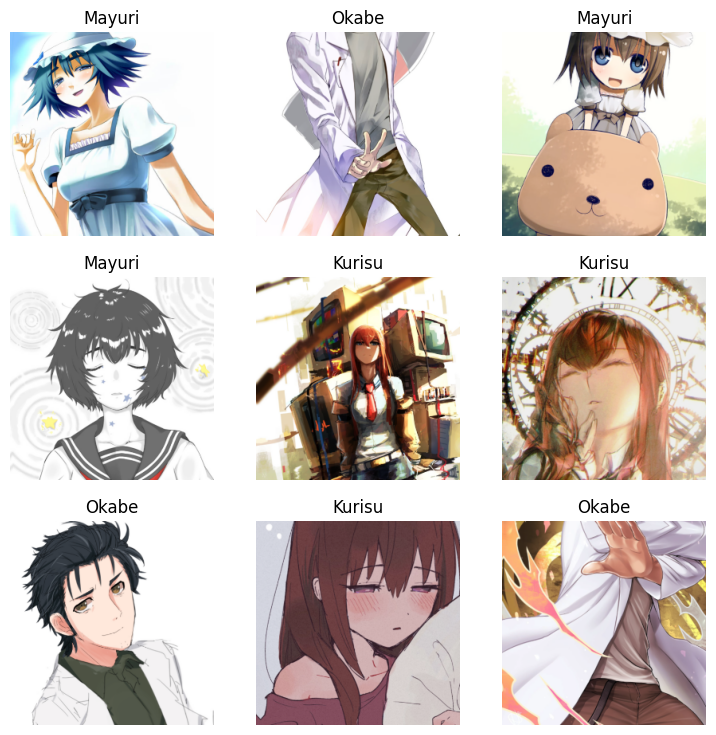

In [43]:
dls.show_batch()

## Creando el modelo de predicción

A continuación vamos a crear nuestra red convolucional usando *transfer learning* y utilizando como base la arquitectura [ResNet 18](https://arxiv.org/abs/1512.03385); aunque existen otros [modelos disponibles](https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw) este modelo proporciona buenos resultados. Al crear nuestra red convolucional también debemos indicar la [métrica](https://docs.fast.ai/metrics.html#metrics) que vamos a utilizar para medir el rendimiento del modelo, en este caso vamos a usar el error_rate y la accuracy.

La primera vez que se ejecuta la siguiente instrucción puede llevar algún tiempo debido a que se tienen que descargar los pesos asociados a la red ResNet 18.

In [44]:
learn = vision_learner(dls,resnet18,metrics=accuracy).to_fp16()

## Seleccionando un learning rate correcto

Aplica la técnica explicada en el blog de [Walk with Fastai](http://walkwithfastai.com/lr_finder).

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0014454397605732083)

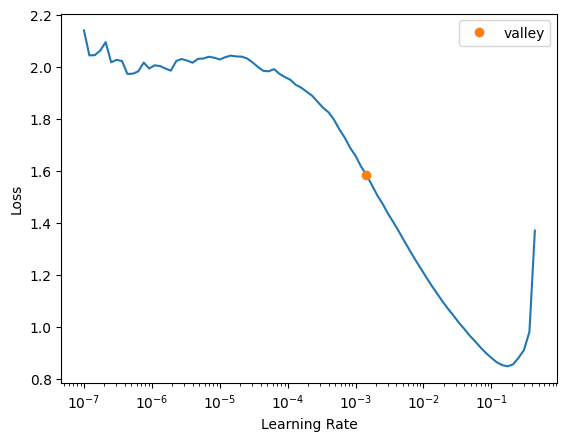

In [45]:
learn.lr_find()

Vemos que el learning rate que nos recomiendan es el mismo que el de las instrucciones 0.001, ahora entrenaremos la red con este learning rate.

### Entrenando la red

El siguiente paso es entrenar la red. Para ello vamos a utilizar el [siguiente procedimiento](https://sgugger.github.io/the-1cycle-policy.html) basado en la idea de fine-tuning:

1. En primer lugar se dejan fijos (congelados) los pesos de la mayoría de capas de la red y sólo se actualizan los de las últimas capas.
2. Se descongelan todas las capas de la red.
3. Se reentrenan todas las capas de la red pero utilizando distintos *learning rates* en cada capa.

La librería fastai proporciona toda la funcionalidad necesaria para llevar a cabo este proceso mediante el método `fine_tune`.

In [51]:
learn.fine_tune(10,base_lr=1e-3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,2.031791,5.451917,0.333333,00:09


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,2.064461,4.323944,0.333333,00:09


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

Para su uso posterior, es conveniente exportar el modelo una vez entrenado.

In [32]:
learn.export()

Podemos ver que dicho modelo se ha guardado en el mismo directorio del dataset.

In [33]:
Path('datasetSG').ls(file_exts='.pkl')

(#1) [Path('datasetSG/export.pkl')]

## Interpretación de los resultados

Vamos a interpretar los resultados utilizando la matriz de confusión.

A continuación se crear una interpretación de los resultados obtenidos con la misma.

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Por último mostramos la matriz de confusión obtenida. Además de la matriz de confusión se puede obtener [otra información](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation).

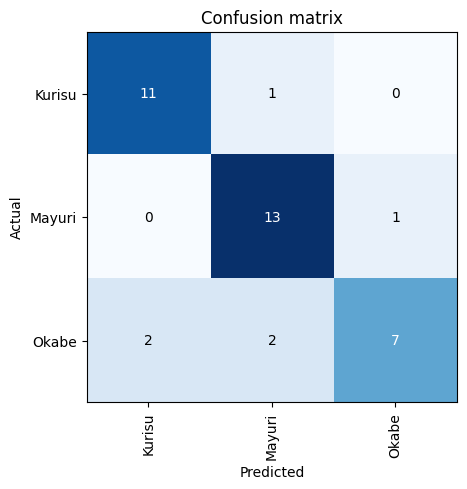

In [35]:
interp.plot_confusion_matrix()

Como podemos ver en la matriz de confusión anterior, el modelo tiende a confundir a Okabe, esto puede deberse a que tengamos cierto ruido en nuestras imágenes (por ejemplo, imágenes que contengan a ambos personajes). Por lo tanto es conveniente limpiar nuestro dataset.

### Evaluando el modelo en el conjunto de test

Para poder evaluar nuestro modelo en el conjunto de test debemos crear un nuevo `DataBlock` y un nuevo `DataLoader`. La única diferencia con el `DataBlock` utilizado previamente es que para hacer la partición del dataset usamos un objeto de la clase `GrandparentSplitter` indicando que el conjunto de validación es nuestro conjunto de test. En el caso del `DataLoader`, la diferencia con el definido anteriormente es que cambiamos la ruta al path.

In [46]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=[*aug_transforms(size=256,min_scale=0.75),Normalize.from_stats(*imagenet_stats)] )
dlsTest = dbTest.dataloaders(path,bs=128)

Para trabajar con este dataloader debemos modificar nuestro objeto `Learner`. En concreto su atributo `dls`.

In [47]:
learn.dls = dlsTest

Ahora podemos evaluar nuestro modelo usando el método `validate`.

In [48]:
learn.validate()

(#2) [7.162691593170166,0.3333333432674408]

El método `validate` nos devuelve dos valores: el valor de la función de pérdida, y el valor de nuestra métrica (la accuracy en este caso). Por lo que podemos ver que el modelo tiene una accuracy en el conjunto de test de aproximadamente un 80% (esto puede variar dependiendo de la ejecución).

## Limpiando el dataset

Como hemos comentado anteriormente puede ocurrir que haya imágenes en nuestro dataset que no deberían estar ahí.


In [49]:
from fastai.vision.widgets import ImageClassifierCleaner

En primer lugar podemos ver aquellas imágenes que tienen una mayor pérdida (es decir, aquellas que el modelo clasifica peor). Esto se puede hacer con ``.plot_top_losses``.

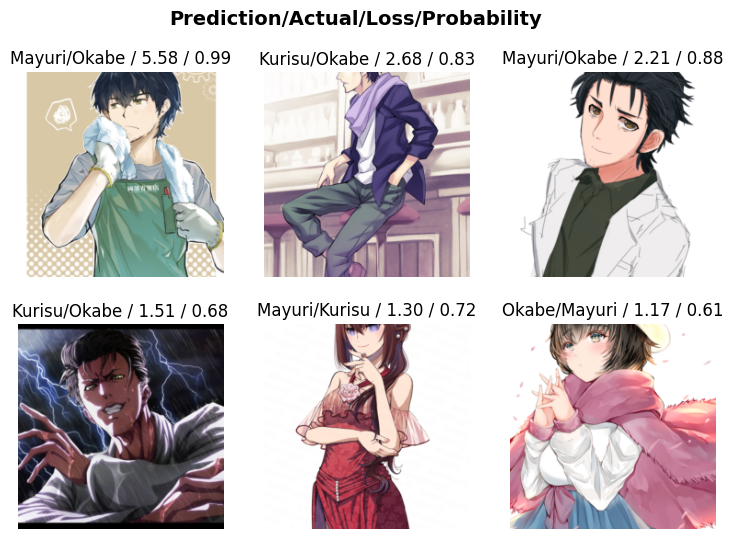

In [50]:
interp.plot_top_losses(6)

A continuación podemos utilizar el siguiente widget para limpiar el dataset.

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

Una vez que hayamos seleccionados para eliminar, podemos usar el siguiente comando.

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

Como se puede apreciar hay ciertas imágenes en nuestro dataset que no son correctas, por lo que deberíamos hacer una limpieza del mismo para conseguir mejores resultados.

### Usando el modelo

Vamos a ver cómo usar el modelo ante una nueva imagen. Para ello lo primero que vamos a hacer es cargar dicho modelo.

In [ ]:
learn_inf = load_learner('datasetSG/export.pkl')

Vamos a probar nuestro modelo con una nueva imagen, en este caso de Mayuri. Comenzamos descargando dicha imagen, y a continuación la abrimos.

In [ ]:
!wget https://64.media.tumblr.com/4e6f3f994528d2a60559a7d99cbb86c8/cbd5f5c29e68c8bb-59/s400x600/ec956a8d40123ce0e9b95a326104b7b1fffa034c.jpg -O mayuri.png

--2025-04-29 17:43:24--  https://64.media.tumblr.com/4e6f3f994528d2a60559a7d99cbb86c8/cbd5f5c29e68c8bb-59/s400x600/ec956a8d40123ce0e9b95a326104b7b1fffa034c.jpg
Resolving 64.media.tumblr.com (64.media.tumblr.com)... 192.0.77.3
Connecting to 64.media.tumblr.com (64.media.tumblr.com)|192.0.77.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30233 (30K) [image/jpeg]
Saving to: ‘mayuri.png’

mayuri.png          100%[===================>]  29.52K  --.-KB/s    in 0.01s   

2025-04-29 17:43:24 (2.07 MB/s) - ‘mayuri.png’ saved [30233/30233]



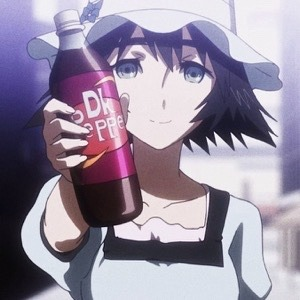

In [ ]:
import PIL
img = PILImage.create('mayuri.png')
img

Ahora podemos usar dicho modelo para hacer inferencia con una nueva imagen mediante el método predict. En nuestro caso vamos a usar una imagen del conjunto de test.

In [ ]:
learn_inf.predict('mayuri.png')

('Mayuri', tensor(1), tensor([5.3698e-04, 9.9825e-01, 1.2160e-03]))

La función anterior devuelve tres valores:
- La clase (buildings en este caso).
- El índice asociado a dicha clase.
- Las probabilidades para cada una de las categorías.  

## Creando una aplicación para nuestro modelo

Es fundamental que los modelos sean usables, por lo que es conveniente proporcionar una interfaz secilla que permita usar nuestros modelos. Para ello, vamos a usar dos herramientas: [Gradio](https://gradio.app/) y los [espacios de HuggingFace](https://huggingface.co/spaces). En concreto vamos a ver cómo construir la siguiente [aplicación](https://huggingface.co/spaces/joheras/futurama).

En primer lugar es necesario que crees una [cuenta en HuggingFace](https://huggingface.co/join). Este paso sólo hay que realizarlo una vez. Además debes  [crear un token de escritura](https://huggingface.co/docs/hub/security-tokens).

Una vez realizados esos dos pasos vamos a descargar una librería que permita subir nuestro modelo a HuggingFace.

In [ ]:
!pip install huggingface_hub["fastai"] -Uq

A continuación nos autenticamos en HuggingFace con el token de escritura creado previamente.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Finalmente, para subir nuestro modelo debemos indicar nuestro nombre de usuario de HuggingFace y un nombre para nuestro modelo.

In [ ]:
from huggingface_hub import push_to_hub_fastai

repo_id = "MarioGL/datasetSG"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pkl:   0%|          | 0.00/46.9M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/MarioGL/datasetSG/commit/beb8f3dab16102d41f9c28b198f7b3c104c1cbe2', commit_message='Push FastAI model using huggingface_hub.', commit_description='', oid='beb8f3dab16102d41f9c28b198f7b3c104c1cbe2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/MarioGL/datasetSG', endpoint='https://huggingface.co', repo_type='model', repo_id='MarioGL/datasetSG'), pr_revision=None, pr_num=None)